<a href="https://colab.research.google.com/github/wombat-42/BIS-LAB/blob/main/grey_wolf_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Custom Objective Function: Rastrigin Function
def objective_function(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# Grey Wolf Optimizer (GWO)
class GreyWolfOptimizer:
    def __init__(self, n_wolves, n_dimensions, max_iter, lb, ub):
        self.n_wolves = n_wolves            # Number of wolves
        self.n_dimensions = n_dimensions    # Number of dimensions
        self.max_iter = max_iter            # Max number of iterations
        self.lb = lb                        # Lower Bound
        self.ub = ub                        # Upper Bound
        self.alpha_pos = np.zeros(n_dimensions)
        self.beta_pos = np.zeros(n_dimensions)
        self.delta_pos = np.zeros(n_dimensions)
        self.alpha_score = float("inf")
        self.beta_score = float("inf")
        self.delta_score = float("inf")
        self.positions = np.random.uniform(lb, ub, (n_wolves, n_dimensions))  # Random positions
        self.scores = np.zeros(n_wolves)

    def update_position(self, wolf_idx):
        # Update positions based on the formula for each wolf (alpha, beta, delta)
        r1 = np.random.random()
        r2 = np.random.random()
        a = 2 - 2 * (self.iteration / self.max_iter)  # a decreases linearly from 2 to 0
        A1 = 2 * a * r1 - a
        A2 = 2 * a * r2 - a
        C1 = 2 * r1
        C2 = 2 * r2

        # Update the position based on the alpha, beta, and delta wolves
        D_alpha = np.abs(C1 * self.alpha_pos - self.positions[wolf_idx])  # Distance from alpha
        D_beta = np.abs(C2 * self.beta_pos - self.positions[wolf_idx])    # Distance from beta
        D_delta = np.abs(C1 * self.delta_pos - self.positions[wolf_idx])  # Distance from delta

        # Update the wolf's position based on the formula
        self.positions[wolf_idx] = self.positions[wolf_idx] - A1 * D_alpha - A2 * D_beta - A1 * D_delta

    def optimize(self):
        # Main loop for GWO
        for self.iteration in range(self.max_iter):
            for i in range(self.n_wolves):
                # Evaluate the fitness
                self.scores[i] = objective_function(self.positions[i])

                # Update the alpha, beta, delta wolves
                if self.scores[i] < self.alpha_score:
                    self.alpha_score = self.scores[i]
                    self.alpha_pos = self.positions[i]

                if self.scores[i] < self.beta_score and self.scores[i] > self.alpha_score:
                    self.beta_score = self.scores[i]
                    self.beta_pos = self.positions[i]

                if self.scores[i] < self.delta_score and self.scores[i] > self.beta_score:
                    self.delta_score = self.scores[i]
                    self.delta_pos = self.positions[i]

            # Update the positions of all wolves based on the alpha, beta, delta wolves
            for i in range(self.n_wolves):
                self.update_position(i)

            print(f"Iteration {self.iteration + 1}: Alpha = {self.alpha_score}")

        return self.alpha_pos, self.alpha_score


# Parameters
n_wolves = 5
n_dimensions = 5
max_iter = 200
lb = -5.12  # Lower Bound for Rastrigin function (typically [-5.12, 5.12])
ub = 5.12   # Upper Bound for Rastrigin function

# Create GWO object
gwo = GreyWolfOptimizer(n_wolves, n_dimensions, max_iter, lb, ub)

# Optimize the function
best_position, best_score = gwo.optimize()

print(f"\nBest Position: {best_position}")
print(f"Best Score: {best_score}")


Iteration 1: Alpha = 83.5574342776398
Iteration 2: Alpha = 83.5574342776398
Iteration 3: Alpha = 83.5574342776398
Iteration 4: Alpha = 83.5574342776398
Iteration 5: Alpha = 83.5574342776398
Iteration 6: Alpha = 83.5574342776398
Iteration 7: Alpha = 83.5574342776398
Iteration 8: Alpha = 83.5574342776398
Iteration 9: Alpha = 83.5574342776398
Iteration 10: Alpha = 83.5574342776398
Iteration 11: Alpha = 83.5574342776398
Iteration 12: Alpha = 83.5574342776398
Iteration 13: Alpha = 83.5574342776398
Iteration 14: Alpha = 83.5574342776398
Iteration 15: Alpha = 83.5574342776398
Iteration 16: Alpha = 83.5574342776398
Iteration 17: Alpha = 83.5574342776398
Iteration 18: Alpha = 83.5574342776398
Iteration 19: Alpha = 83.5574342776398
Iteration 20: Alpha = 83.5574342776398
Iteration 21: Alpha = 83.5574342776398
Iteration 22: Alpha = 83.5574342776398
Iteration 23: Alpha = 83.5574342776398
Iteration 24: Alpha = 83.5574342776398
Iteration 25: Alpha = 83.5574342776398
Iteration 26: Alpha = 83.557434277

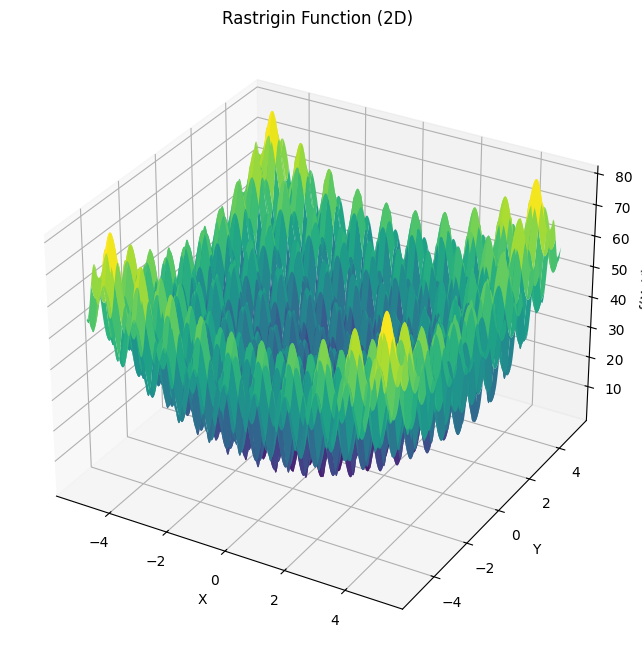

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rastrigin function definition
def rastrigin(X):
    A = 10
    return A * X.shape[1] + np.sum(X**2 - A * np.cos(2 * np.pi * X), axis=1)

# Create a grid of points in 2D space
x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)

X, Y = np.meshgrid(x, y)

# Stack X and Y to create an array of shape (400 * 400, 2)
points = np.vstack([X.ravel(), Y.ravel()]).T

# Apply the rastrigin function to all points
Z = rastrigin(points)

# Reshape the result back into the shape of the grid (400, 400)
Z = Z.reshape(X.shape)

# Plotting the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Rastrigin Function (2D)')

# Show the plot
plt.show()


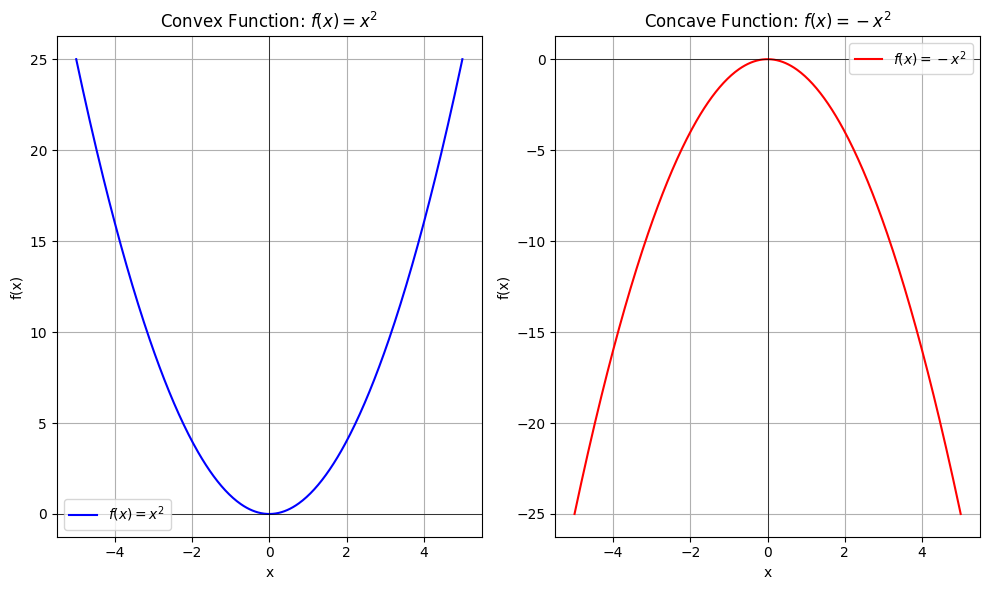

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define convex and concave functions
def convex_function(x):
    return x**2

def concave_function(x):
    return -x**2

# Create a range of x values
x = np.linspace(-5, 5, 400)

# Calculate the corresponding y values for convex and concave functions
y_convex = convex_function(x)
y_concave = concave_function(x)

# Plotting
plt.figure(figsize=(10, 6))

# Plot convex function
plt.subplot(1, 2, 1)
plt.plot(x, y_convex, label=r'$f(x) = x^2$', color='blue')
plt.title('Convex Function: $f(x) = x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()

# Plot concave function
plt.subplot(1, 2, 2)
plt.plot(x, y_concave, label=r'$f(x) = -x^2$', color='red')
plt.title('Concave Function: $f(x) = -x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()
